<a href="https://colab.research.google.com/github/gentomacine/my-cv/blob/main/Chidozie%2Ctask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
# import relevant libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns



In [107]:
# Load the data
df = pd.read_csv('time_series_covid19_deaths_global.csv')

# Define the list of countries I want to include
countries = ['US', 'United Kingdom', 'Nigeria', 'China', 'India', 'Japan', 'Egypt', 'Ghana', 'Portugal', 'Iran','Liberia']

# Filter for the selected countries
df_filtered = df[df['Country/Region'].isin(countries)]

<ipython-input-108-93c86ceeb608>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melted['Date'] = pd.to_datetime(df_melted['Date'], errors='coerce')


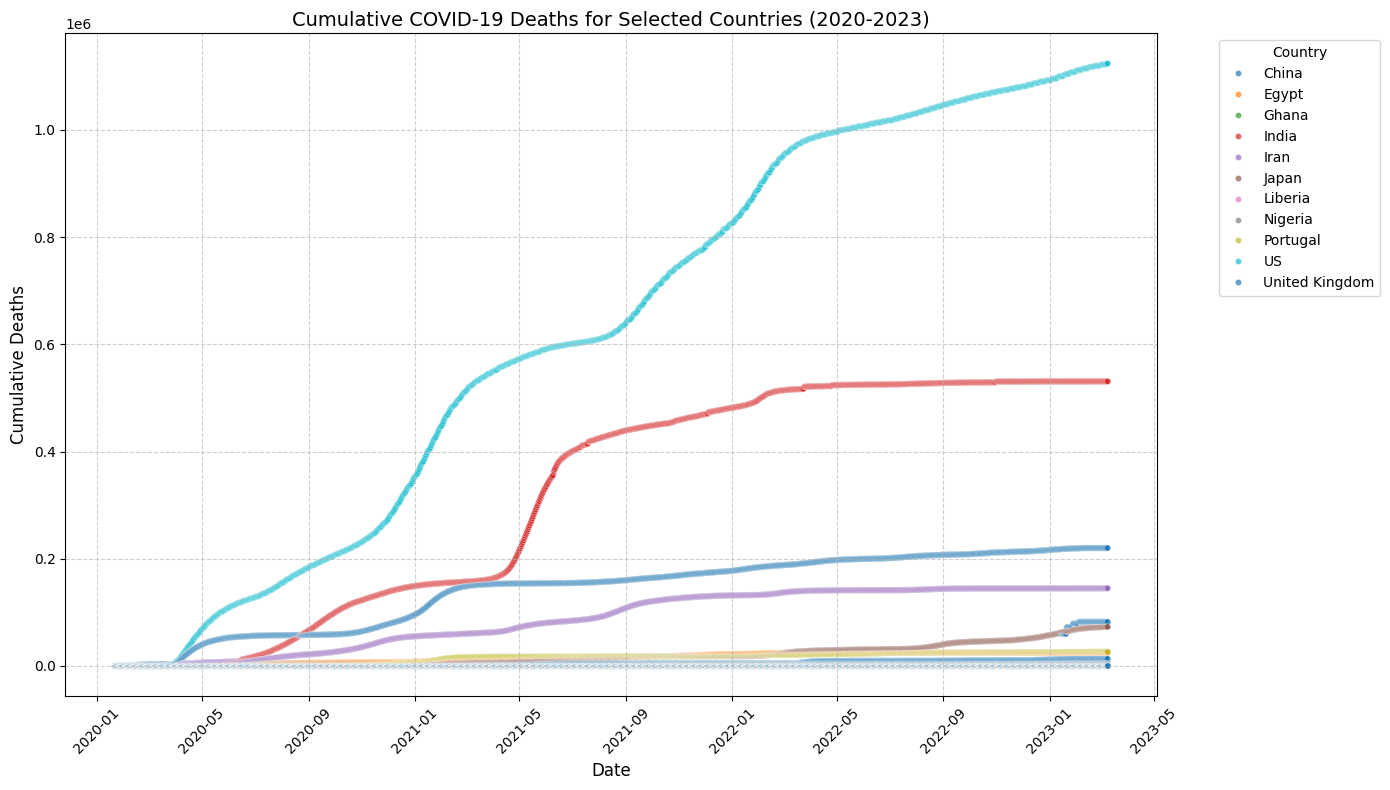

In [108]:
# Scatter Plot
# Identify date columns dynamically (excluding non-date columns)
date_columns = df_filtered.columns[df_filtered.columns.str.match(r'\d{1,2}/\d{1,2}/\d{2,4}')]

# Melt the dataframe into long format
df_melted = df_filtered.melt(id_vars=['Country/Region'], value_vars=date_columns,
                             var_name='Date', value_name='Deaths')

# Convert Date column to datetime format
df_melted['Date'] = pd.to_datetime(df_melted['Date'], errors='coerce')

# Remove NaT values in 'Date' column
df_melted.dropna(subset=['Date'], inplace=True)

# Ensure deaths are numeric (handling any potential non-numeric values)
df_melted['Deaths'] = pd.to_numeric(df_melted['Deaths'], errors='coerce')

# Filter data for selected countries and years (up to 2023)
df_melted = df_melted[df_melted['Country/Region'].isin(countries) & (df_melted['Date'].dt.year <= 2023)]

# Create an enhanced scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_melted, x='Date', y='Deaths', hue='Country/Region', alpha=0.7, s=20, palette='tab10')

# Customizing the plot
plt.title('Cumulative COVID-19 Deaths for Selected Countries (2020-2023)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Deaths', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

In [109]:

# Filter dataset
df_filtered = df[df['Country/Region'].isin(countries)].drop(columns=['Province/State', 'Lat', 'Long'])

# Convert wide format to long format
df_melted = df_filtered.melt(id_vars=['Country/Region'], var_name='Date', value_name='Total_Deaths')

# Convert Date to datetime format
df_melted['Date'] = pd.to_datetime(df_melted['Date'])

# Pivot table (cross-tabulation)
cross_tab = df_melted.pivot_table(index='Date', columns='Country/Region', values='Total_Deaths', aggfunc='sum')

# Standardize the data
scaler = StandardScaler()
cross_tab_scaled = scaler.fit_transform(cross_tab.fillna(0))


# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(cross_tab_scaled)


# Convert to DataFrame
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=cross_tab.index)

# Compute total deaths per country
latest_date = cross_tab.index[-1]  # Get the last date in the dataset
total_deaths_per_country = cross_tab.loc[latest_date].reset_index()

# Rename columns for clarity
total_deaths_per_country.columns = ['Country', 'Total_Deaths']


# Function to get total deaths for a specific year
def get_yearly_deaths(year, cross_tab):
    """Calculates the total deaths in a given year by subtracting the last record
    of the previous year from the last record of the given year."""
    end_of_year = cross_tab[cross_tab.index.year == year].iloc[-1]  # Last record of the year
    start_of_year = cross_tab[cross_tab.index.year == year - 1].iloc[-1] if year > 2020 else 0  # Previous year's last record
    return end_of_year - start_of_year  # Compute yearly deaths

# Get deaths for each year from 2020 to 2023
years = [2020, 2021, 2022, 2023]
yearly_deaths_data = {year: get_yearly_deaths(year, cross_tab) for year in years}

# Create a DataFrame
yearly_deaths = pd.DataFrame(yearly_deaths_data)

# Rename columns
yearly_deaths.columns = [f"Deaths_{year}" for year in years]

# Add country names as a separate column
yearly_deaths.insert(0, "Country", yearly_deaths.index)

# Add a total deaths column
yearly_deaths["Total_Deaths"] = yearly_deaths.iloc[:, 1:].sum(axis=1)

# Print results in a single line per row
print(yearly_deaths.to_string(index=False))

       Country  Deaths_2020  Deaths_2021  Deaths_2022  Deaths_2023  Total_Deaths
         China         4881          222        11999        83954        101056
         Egypt         7631        14121         3049           11         24812
         Ghana          335          960          166            1          1462
         India       148994       332492        49219           74        530779
          Iran        55223        76383        13079          248        144933
         Japan         3492        14900        38882        15723         72997
       Liberia           83          204            7            1           295
       Nigeria         1289         1741          125            0          3155
      Portugal         6906        12049         6759          552         26266
            US       350604       474864       267296        31072       1123836
United Kingdom        95107        82762        39185         3667        220721


<ipython-input-109-e8a555726f79>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melted['Date'] = pd.to_datetime(df_melted['Date'])


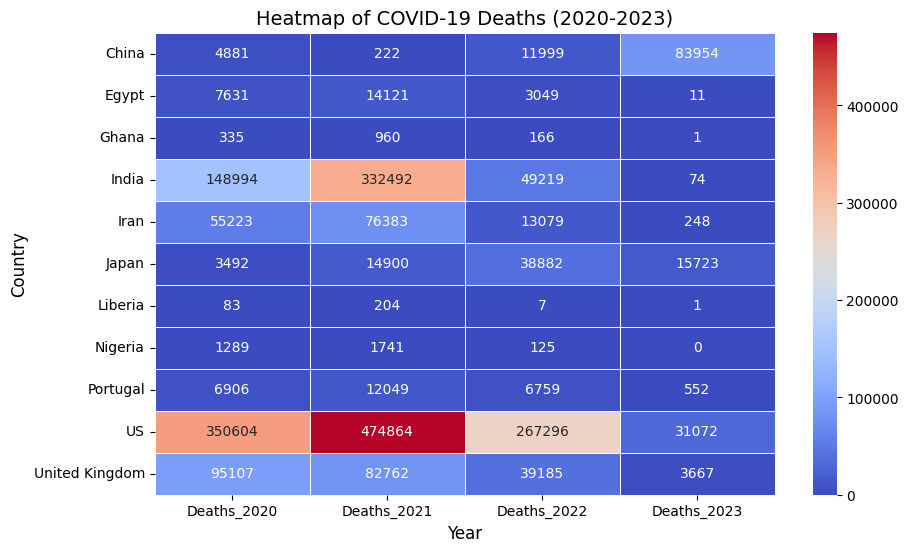

In [93]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(yearly_deaths.set_index("Country").iloc[:, :-1],
            annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)

# Add title and labels
plt.title("Heatmap of COVID-19 Deaths (2020-2023)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Country", fontsize=12)

# Show the plot
plt.show()

[0.8817552  0.08932703]


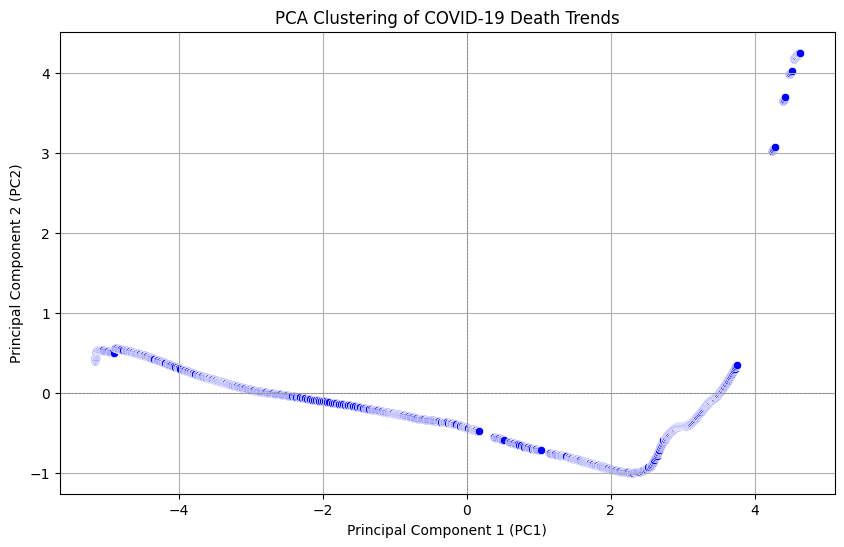

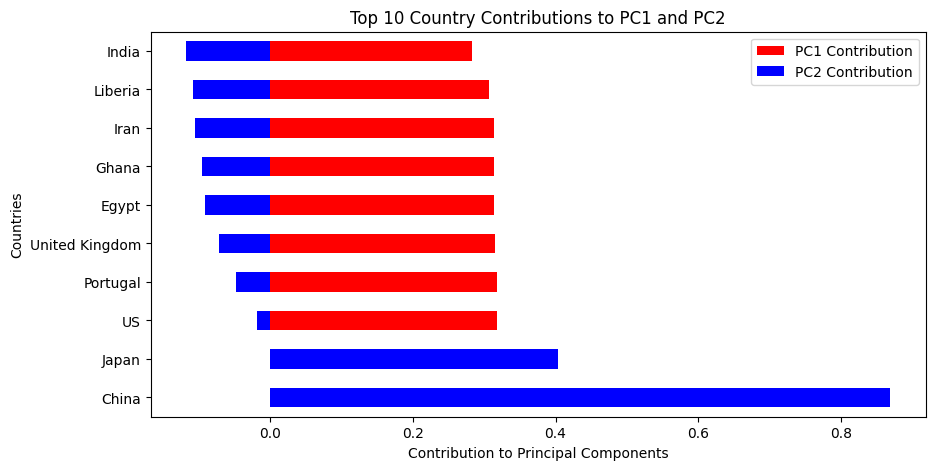

In [104]:
print(pca.explained_variance_ratio_)


# Fit PCA (if not already done)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(cross_tab_scaled)  # Replace with your scaled dataset
cross_tab["PC1"] = pca_result[:, 0]
cross_tab["PC2"] = pca_result[:, 1]

# Scatter Plot of PCA Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PC1", y="PC2", data=cross_tab, color='blue')
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("PCA Clustering of COVID-19 Death Trends")
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.show()

# PCA Loadings: Which countries contribute most to PC1 & PC2?
loadings = pca.components_.T  # Get loadings
loading_df = pd.DataFrame(loadings, columns=["PC1", "PC2"], index=cross_tab.columns[:-2])  # Exclude added PC columns

# Visualizing top contributors to PC1 and PC2
plt.figure(figsize=(10, 5))
loading_df["PC1"].nlargest(10).plot(kind='barh', color='red', label="PC1 Contribution")
loading_df["PC2"].nlargest(10).plot(kind='barh', color='blue', label="PC2 Contribution")
plt.xlabel("Contribution to Principal Components")
plt.ylabel("Countries")
plt.title("Top 10 Country Contributions to PC1 and PC2")
plt.legend()
plt.show()